In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('Flat_Prices.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [ ]:
df["floor_area_sqm"].dtype

dtype('float64')

In [ ]:
import re

In [ ]:
def myfunc(x):
    t=re.findall("(.*) TO (.*)",x)
    avrg = (int(t[0][0])+int(t[0][1]))//2
    return avrg


In [ ]:
df["storey_range"]=df["storey_range"].apply(myfunc)

In [ ]:
# Getting the shape of the data
print('Shape of the data :', df.shape)

Shape of the data : (92270, 11)


In [ ]:
# Checking NULL values
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [ ]:
# Checking NULL values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [ ]:
# Simple Data Pre-Processing to convert 'remaining_lease' and 'storey_range'
# in numerical format

In [ ]:
# dealing with columns mentioned above
df.loc[:, 'storey_avg'] = 0
df.loc[:, 'storey_var'] = 0

for i in df.index:
    tmp = df['remaining_lease'][i].split(' ')
    if (len(tmp) == 2):
        df['remaining_lease'][i] = float(tmp[0])
    else:
        df['remaining_lease'][i] = float(tmp[0]) + int(tmp[2])/ 12.0
    
    tmp = df['storey_range'][i].split(' ')
    df['storey_avg'][i] = (float(tmp[0]) + float(tmp[2])) / 2.0
    df['storey_var'][i] = df['storey_avg'][i] - float(tmp[0])

del df['storey_range']

df['remaining_lease'] = pd.DataFrame(df['remaining_lease'], dtype = np.float64)
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey_avg,storey_var
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61.333333,232000.0,11,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60.583333,250000.0,2,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62.416667,262000.0,2,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62.083333,265000.0,5,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62.416667,265000.0,2,1


In [ ]:
# Getting Statistical Information
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,storey_avg,storey_var
count,92270.000000,92270.000000,92270.000000,9.227000e+04,92270.000000,92270.0
mean,97.768362,1994.444175,74.773286,4.448869e+05,8.638853,1.0
std,24.263575,13.064066,13.020360,1.548243e+05,5.807275,0.0
min,31.000000,1966.000000,44.833333,1.400000e+05,2.000000,1.0
25%,82.000000,1984.000000,64.666667,3.330000e+05,5.000000,1.0
50%,95.000000,1995.000000,74.833333,4.150000e+05,8.000000,1.0
75%,113.000000,2003.000000,84.250000,5.200000e+05,11.000000,1.0
max,249.000000,2019.000000,97.750000,1.258000e+06,50.000000,1.0


<AxesSubplot: xlabel='resale_price', ylabel='Density'>

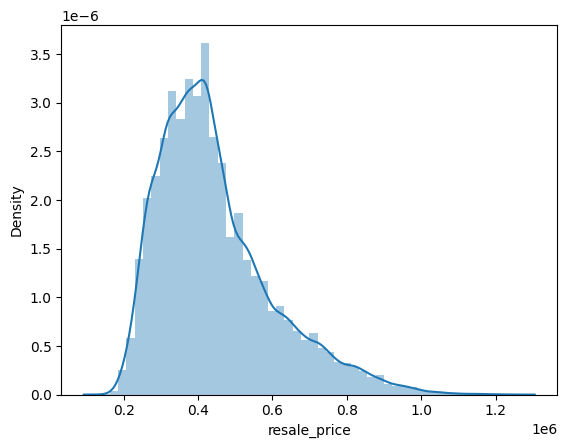

In [ ]:
# Density Curve
sns.distplot(df['resale_price'], kde = True)

In [ ]:
# There are some outliers in the right tail region after 750000.

<AxesSubplot: xlabel='floor_area_sqm', ylabel='resale_price'>

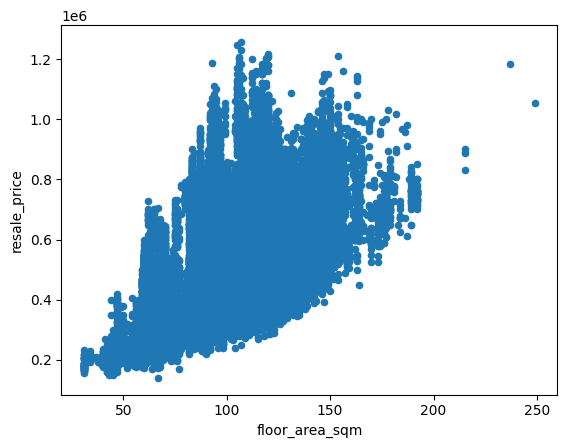

In [ ]:
# Relationship between numerical input features
data = pd.concat([df['resale_price'], df['floor_area_sqm']], axis = 1)
data.plot.scatter(x = 'floor_area_sqm', y = 'resale_price')

In [ ]:
# There is a weak positive correlation between floor area and resale price.

<AxesSubplot: xlabel='storey_avg', ylabel='resale_price'>

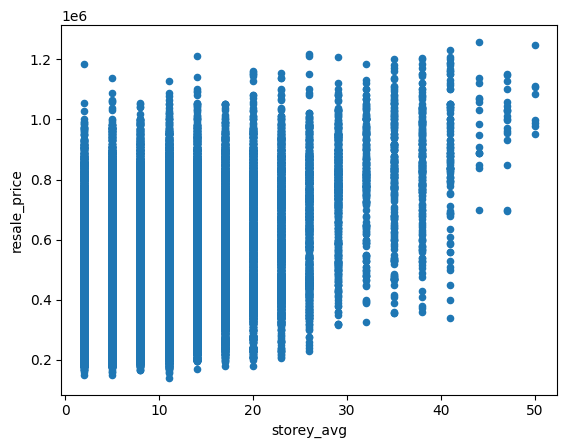

In [ ]:
# Relationship between numerical input features
data = pd.concat([df['resale_price'], df['storey_avg']], axis = 1)
data.plot.scatter(x = 'storey_avg', y = 'resale_price')

In [ ]:
# There is approximately no correlation between storey avg and resale price.

<AxesSubplot: xlabel='remaining_lease', ylabel='resale_price'>

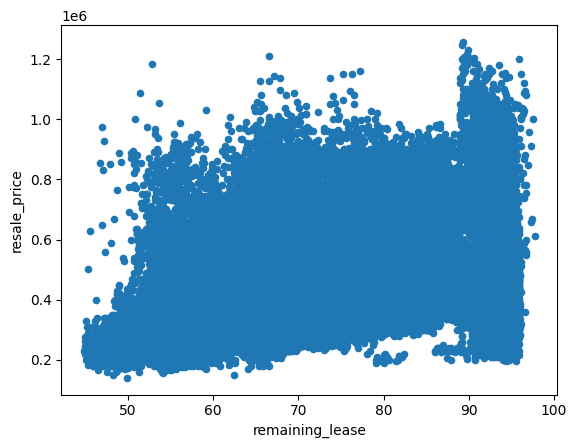

In [ ]:
# Relationship between numerical input features
data = pd.concat([df['resale_price'], df['remaining_lease']], axis = 1)
data.plot.scatter(x = 'remaining_lease', y = 'resale_price')

In [ ]:
# The relationship between remaining lease and resale price is not clear.

Text(0.5, 1.0, 'Correlation betwen features')

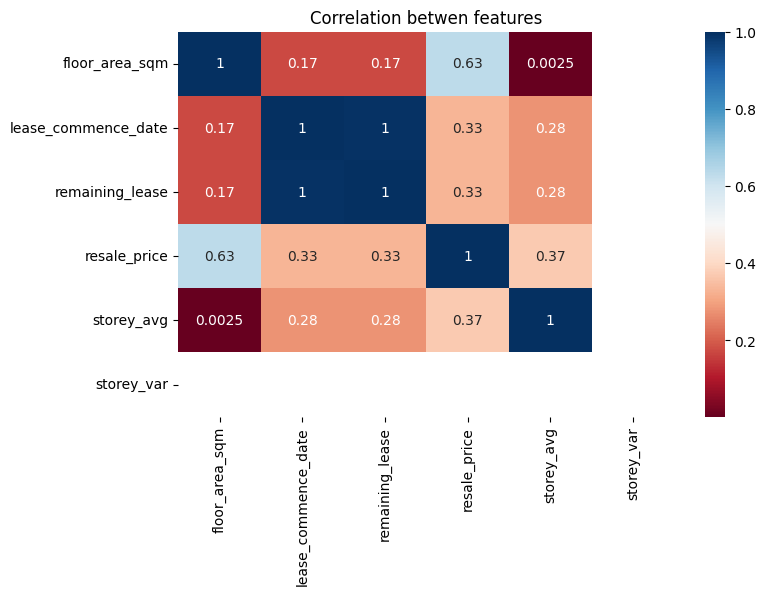

In [ ]:
# Correlation HeatMap
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), cmap = 'RdBu', annot = True)
plt.title('Correlation betwen features')

In [ ]:
# We can drop storey_var feature.
# floor_area_sqm is having a moderate positive relationship with resale_price.
# lease_commencement_date and remaining_lease are perfectly correlated.

In [ ]:
# Chi-Squared Test
# For testing independence of categorical features
from scipy.stats import chi2_contingency

# Function
def test_cat_depend(feat1, feat2):
    # grouping and counting
    obs = pd.crosstab(df[feat1], df[feat2])
    # chi2 test
    chi2, p_val, dof, expecte = chi2_contingency(obs)
    print('Test Result ({}, {}) :'.format(feat1, feat2))
    print('-'*20)
    print('p_val : {}'.format(p_val))
    if (p_val < 0.05):
        print('{} and {} are independent !'.format(feat1, feat2))
    else:
        print('{} and {} are dependent !'.format(feat1, feat2))
    print('-'*20)

In [ ]:
# Creating the list of numerical features and categorical features
cat_feats = ['month','town','flat_type','block','street_name','flat_model']
num_feats = ['floor_area_sqm','lease_commence_date','remaining_lease','storey_avg']

In [ ]:
# Call Chi_Squared Function
for i in range(1, len(cat_feats)-1):
    for j in range(i+1, len(cat_feats)):
        test_cat_depend(cat_feats[i], cat_feats[j])

Test Result (town, flat_type) :
--------------------
p_val : 0.0
town and flat_type are independent !
--------------------
Test Result (town, block) :
--------------------
p_val : 0.0
town and block are independent !
--------------------
Test Result (town, street_name) :
--------------------
p_val : 0.0
town and street_name are independent !
--------------------
Test Result (town, flat_model) :
--------------------
p_val : 0.0
town and flat_model are independent !
--------------------
Test Result (flat_type, block) :
--------------------
p_val : 0.0
flat_type and block are independent !
--------------------
Test Result (flat_type, street_name) :
--------------------
p_val : 0.0
flat_type and street_name are independent !
--------------------
Test Result (flat_type, flat_model) :
--------------------
p_val : 0.0
flat_type and flat_model are independent !
--------------------
Test Result (block, street_name) :
--------------------
p_val : 0.0
block and street_name are independent !
-----

In [ ]:
# All the categorical features are independent.

In [ ]:
# ANOVA Test to select categorical features
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm

# tmp = ''
# for i in range(len(cat_feats)):
#     tmp += 'C({})+'.format(cat_feats[i])
# tmp = tmp[:-1]

# # Ordinary Least Square Model
# model = ols('resale_price ~ {}'.format(tmp), df).fit()
# anova_lm(model)

In [ ]:
# Splitting the data into input features and target variable
X = df.drop('resale_price', axis = 1)
y = df['resale_price']

In [ ]:
# One Hot Encoding and Standardizing
from sklearn.preprocessing import StandardScaler
# use pd.get_dummies for OHE
X = pd.get_dummies(X, columns = cat_feats)

# Use StandardScaler to Standardize
scaler = StandardScaler()
X[num_feats] = scaler.fit_transform(X[num_feats])

# Getting Statistical properties
X.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,storey_avg,storey_var,month_2017-01,month_2017-02,month_2017-03,month_2017-04,month_2017-05,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
count,9.227000e+04,9.227000e+04,9.227000e+04,9.227000e+04,92270.0,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000,...,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000,92270.000000
mean,-2.830774e-16,4.630271e-15,-1.047294e-17,2.094588e-17,1.0,0.012843,0.011759,0.020624,0.019931,0.021459,...,0.000477,0.134973,0.109776,0.000444,0.000119,0.040707,0.028406,0.000596,0.001593,0.000965
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,0.112596,0.107800,0.142124,0.139763,0.144909,...,0.021832,0.341697,0.312612,0.021075,0.010918,0.197611,0.166130,0.024408,0.039883,0.031043
min,-2.751809e+00,-2.177295e+00,-2.299484e+00,-1.143202e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.498815e-01,-7.994625e-01,-7.762208e-01,-6.266060e-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.140960e-01,4.254635e-02,4.611841e-03,-1.100097e-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.277607e-01,6.549164e-01,7.278421e-01,4.065865e-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.232901e+00,1.879657e+00,1.764685e+00,7.122337e+00,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_rpred = regressor.predict(X_test)

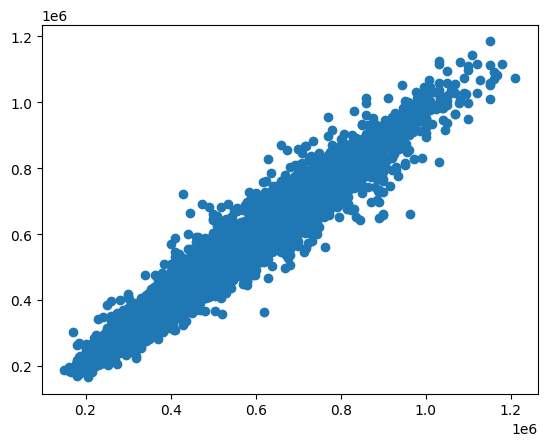

In [ ]:
plt.scatter(tt,y_rpred)

In [ ]:
X=np.arange(0,100,2)

In [ ]:
X

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

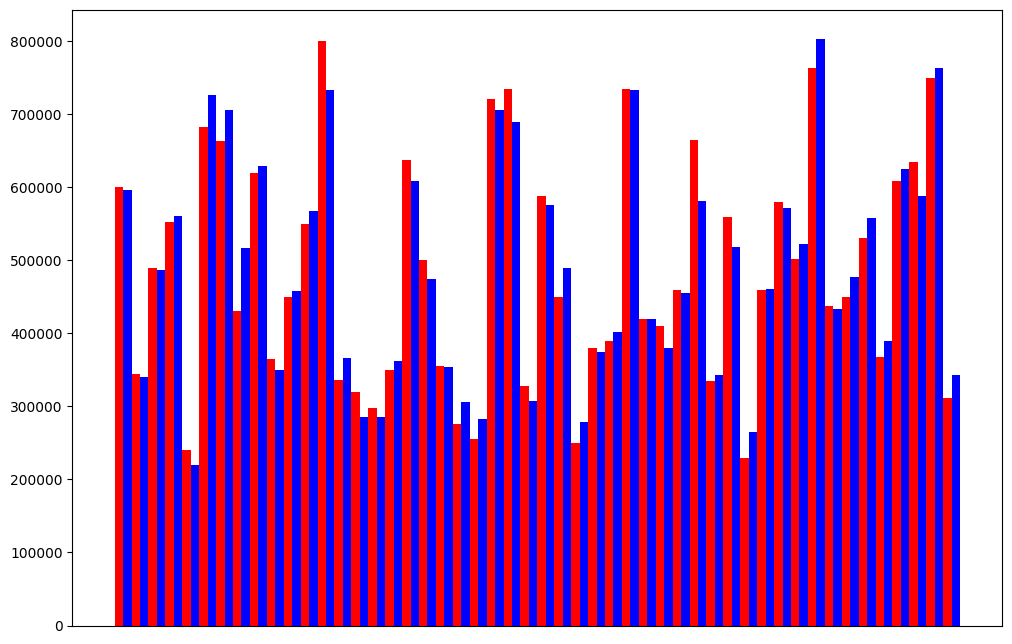

In [ ]:
fig = plt.subplots(figsize =(12, 8))
plt.bar(x=X,height=tt.flatten()[:50],color="red",width=1)
plt.bar(x=X+1,height=y_rpred.flatten()[:50],color="blue",width=1)
plt.xticks([])
plt.show()

In [ ]:
# Defining functions for model evaluation
# Importing important libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def evaluation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r_squared = r2_score(y_true, y_pred)
    return r_squared



In [ ]:
rmse = evaluation(y_test, y_pred)
print('RMSE :', rmse)

RMSE : 0.9658687480362131


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dregressor = DecisionTreeRegressor(random_state = 0)
dregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_dpred = dregressor.predict(X_test)

In [ ]:
d_rmse = evaluation(y_test, y_dpred)
print('RMSE :', d_rmse)

RMSE : 0.9469193292420804


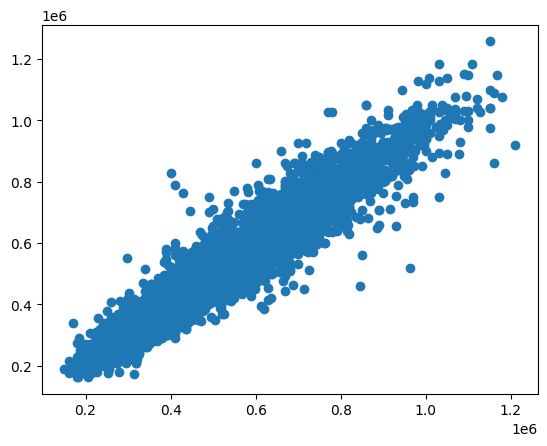

In [ ]:
plt.scatter(tt,y_dpred)

In [ ]:
import xgboost as xgb

In [ ]:
x_reg = xgb.XGBRegressor()
x_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
y_xpred = x_reg.predict(X_test)

In [ ]:
x_rmse = evaluation(y_test, y_xpred)
print('RMSE :', x_rmse)

RMSE : 0.9519710547181006


In [ ]:
tt=y_test.to_numpy().reshape((23068,1))

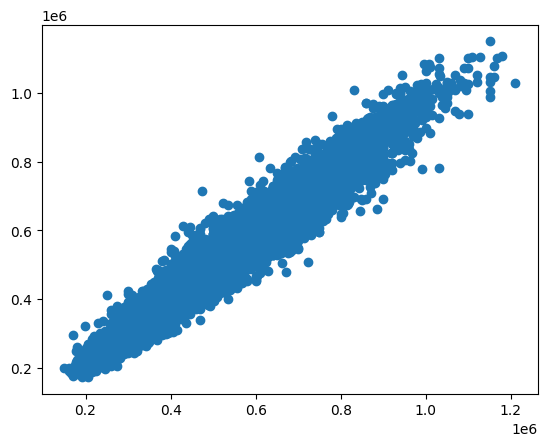

In [ ]:
plt.scatter(tt,y_xpred)

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
X.shape

(92270, 3150)

In [ ]:
ann.add(tf.keras.Input(shape=(3150,)))

In [ ]:
ann.add(tf.keras.layers.Dense(units=800, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=200, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'MSE', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
2163/2163 [==============================] - 47s 21ms/step - loss: 42788032512.0000 - accuracy: 0.0000e+00
Epoch 2/50
2163/2163 [==============================] - 49s 22ms/step - loss: 2389378048.0000 - accuracy: 0.0000e+00
Epoch 3/50
2163/2163 [==============================] - 48s 22ms/step - loss: 1691554816.0000 - accuracy: 0.0000e+00
Epoch 4/50
2163/2163 [==============================] - 47s 22ms/step - loss: 1534761088.0000 - accuracy: 0.0000e+00
Epoch 5/50
2163/2163 [==============================] - 47s 22ms/step - loss: 1464131456.0000 - accuracy: 0.0000e+00
Epoch 6/50
2163/2163 [==============================] - 47s 22ms/step - loss: 1424196736.0000 - accuracy: 0.0000e+00
Epoch 7/50
2163/2163 [==============================] - 47s 22ms/step - loss: 1391531520.0000 - accuracy: 0.0000e+00
Epoch 8/50
2163/2163 [==============================] - 50s 23ms/step - loss: 1349841152.0000 - accuracy: 0.0000e+00
Epoch 9/50
2163/2163 [==============================] - 51s 24m

In [ ]:
y_pred = ann.predict(X_test)

721/721 [==============================] - 6s 8ms/step


In [ ]:
y_pred = ann.predict(X_test)

721/721 [==============================] - 6s 8ms/step


In [ ]:
tt=y_test.to_numpy().reshape((23068,1))

In [ ]:
y_pred.shape

(23068, 1)

In [ ]:
np.concatenate((tt,y_pred),1)

array([[362800.     , 362377.6875 ],
       [530000.     , 560811.8125 ],
       [385000.     , 372694.75   ],
       ...,
       [461000.     , 492564.6875 ],
       [315000.     , 332757.03125],
       [368000.     , 365705.0625 ]])

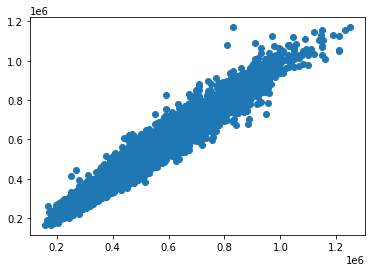

In [ ]:
plt.scatter(tt,y_pred)

In [ ]:
gg=(abs(tt-y_pred))/tt
sum(gg)/len(gg)


array([0.04572694])